In [85]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [86]:
img=cv2.imread('./dataset/messi/0_GettyImages-1258227095.jpg')

In [87]:
img.shape


(345, 615, 3)

### The first and second coordinates are X and Y axis and the third co-ordinate is rgb channel

<Figure size 640x480 with 0 Axes>

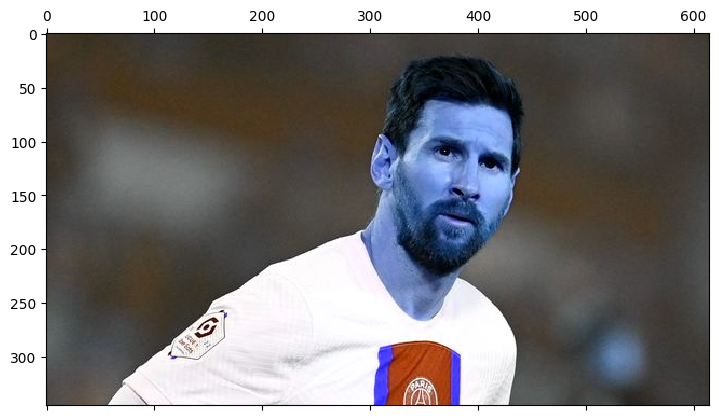

In [88]:
plt.gray()
#plt.figure(figsize=(6,6))
plt.matshow(img)

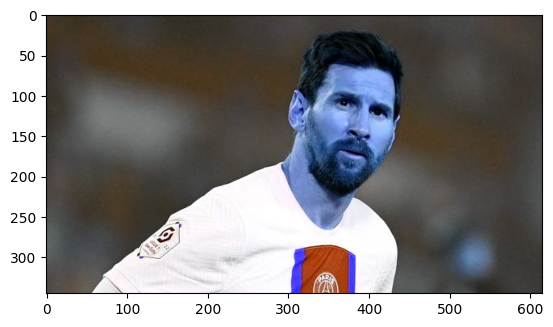

In [89]:
plt.imshow(img)

### matshow is primarily designed for displaying 2-dimensional matrices, adjusting the aspect ratio, and providing labels for the indices. imshow is more versatile and can handle both 2-dimensional and 3-dimensional arrays, allowing greater control over the aspect ratio and colormap selection.

#### The aspect parameter can take different forms of input:

#### 'auto' or None: This is the default behavior. It lets Matplotlib automatically determine the aspect ratio based on the data and the axes' aspect ratio.
#### A scalar value: You can specify a specific aspect ratio value, where 1.0 represents the original . For example, aspect=0.5 would result in height by half compare to the orginal height.


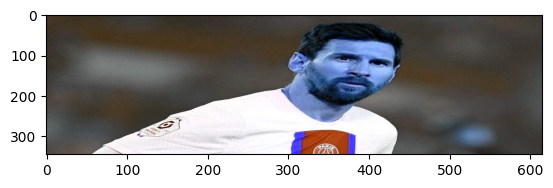

In [90]:
plt.imshow(img,aspect=0.5)

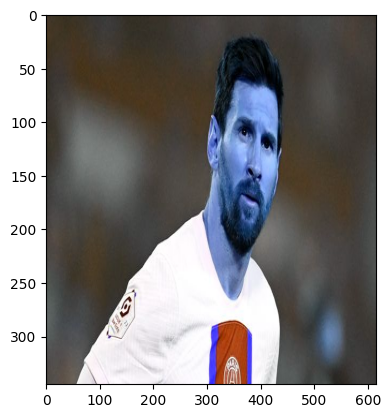

In [91]:
plt.imshow(img,aspect=2)

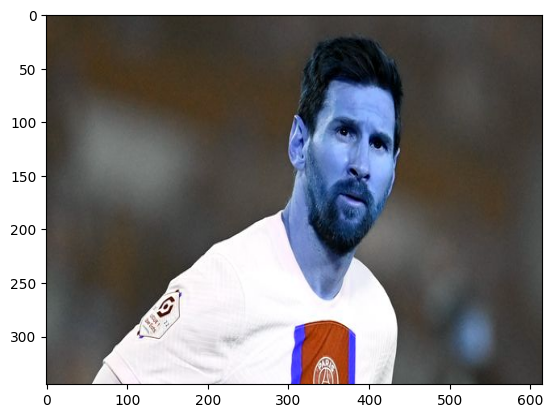

In [92]:
plt.imshow(img,aspect='auto')

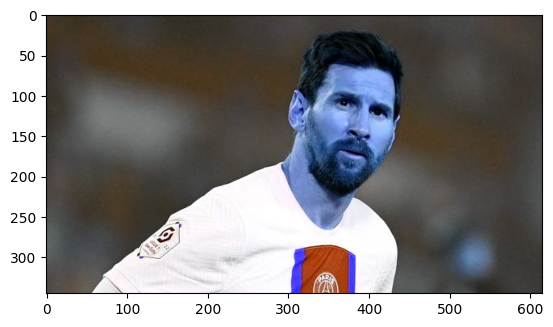

In [93]:
plt.imshow(img, aspect=None)

In [94]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

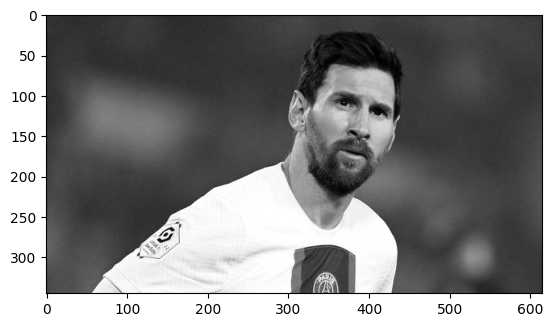

In [95]:
plt.imshow(gray)

In [96]:
gray.shape
#removes the 3rd dimension of the rgb color
gray

array([[55, 54, 52, ..., 51, 51, 51],
       [52, 52, 52, ..., 51, 51, 51],
       [50, 50, 51, ..., 52, 52, 52],
       ...,
       [73, 70, 70, ..., 57, 57, 56],
       [71, 69, 70, ..., 57, 56, 55],
       [76, 68, 71, ..., 57, 56, 56]], dtype=uint8)

In [97]:
face_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')

In [98]:
face=face_cascade.detectMultiScale(gray,1.3,5)

In [99]:
face

array([[321,  63, 134, 134]], dtype=int32)

In [100]:
x,y,w,h=face[0]
x,y,w,h

(321, 63, 134, 134)

In [101]:
face_image=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

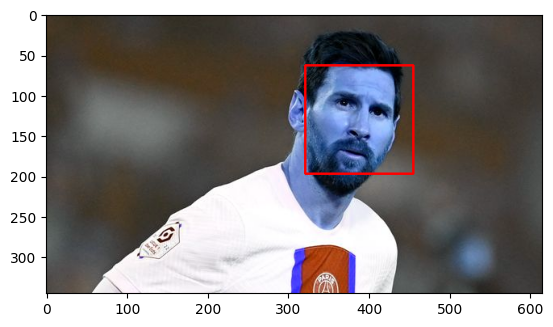

In [102]:
plt.imshow(face_image)

In [103]:
eye_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

In [104]:
eye=eye_cascade.detectMultiScale(gray,1.3,5)

In [105]:
eye

array([[352,  91,  37,  37],
       [392, 102,  36,  36]], dtype=int32)

In [106]:
for (ex, ey, ew, eh) in eye:
    eye_image=cv2. rectangle (face_image, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)

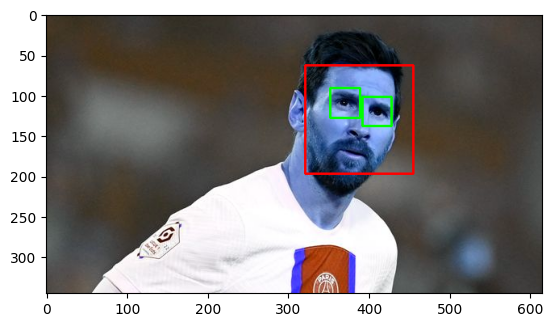

In [107]:
plt.imshow(eye_image)

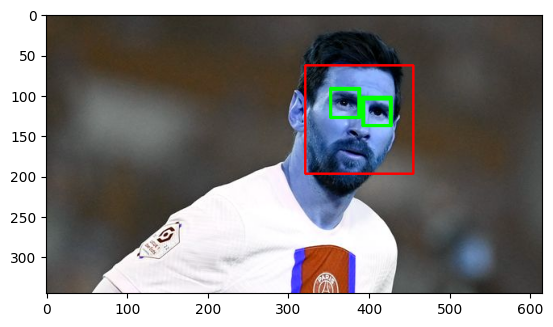

In [108]:
cv2.destroyAllWindows ()
for (x,y,w, h) in face:
    face_img = cv2.rectangle (img, (x,y), (x+w, y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w] # roi_gray contains the view of the face_img, so any changes in the roi_gray will also have changes in the face_img
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade. detectMultiScale (roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2. rectangle (roi_color, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
plt.figure ()
plt.imshow (face_img, cmap='gray')
plt.show()

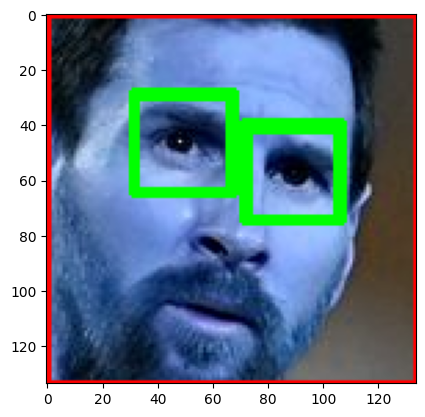

In [109]:
plt.imshow(roi_color)

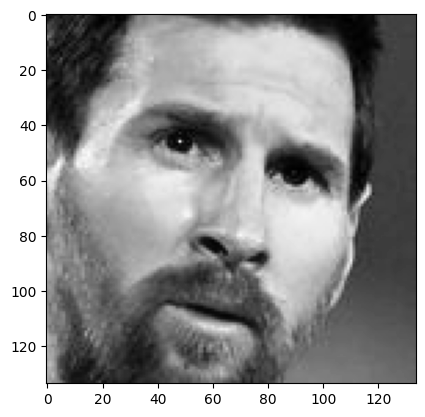

In [110]:
plt.imshow(roi_gray)

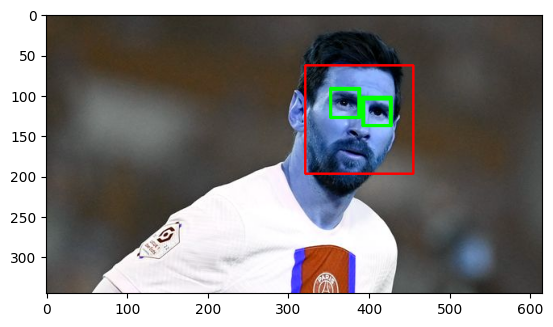

In [111]:
plt.imshow(img)

In [112]:
def crop_image (img_path):
    eyes=[]
    img=cv2.imread(img_path)
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    face=face_cascade.detectMultiScale(gray)
    for (x,y,w,h) in face:
        roi_gray=gray[y:y+h,x:x+w]
        roi_colour=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_colour

        
        
    

In [113]:
cropped_image=crop_image('./dataset/messi/0_GettyImages-1258227095.jpg')

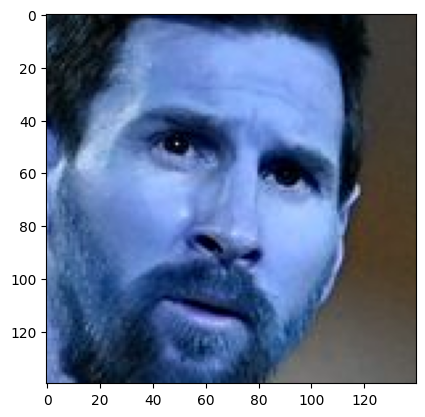

In [114]:
plt.imshow(cropped_image)

In [115]:
print(cropped_image)

[[[ 64  80  87]
  [ 43  60  69]
  [ 15  28  36]
  ...
  [ 63  57  50]
  [ 63  57  50]
  [ 64  58  51]]

 [[ 58  74  81]
  [ 31  48  57]
  [ 11  24  32]
  ...
  [ 63  57  50]
  [ 64  58  51]
  [ 64  58  51]]

 [[ 42  58  65]
  [ 16  33  42]
  [ 13  25  35]
  ...
  [ 65  59  52]
  [ 65  59  52]
  [ 65  59  52]]

 ...

 [[111 136 198]
  [106 131 193]
  [121 145 205]
  ...
  [ 99  96  92]
  [ 98  95  91]
  [ 97  94  90]]

 [[108 133 195]
  [104 129 191]
  [118 143 205]
  ...
  [ 97  96  92]
  [ 96  95  91]
  [ 95  94  90]]

 [[114 139 201]
  [101 126 188]
  [103 128 190]
  ...
  [ 95  94  90]
  [ 94  93  89]
  [ 93  92  88]]]


### let us try a obstructed image where the eyes are not clearly feasible

In [116]:
cropped_image_obstructed=crop_image('./dataset/messi/2582992-messi-laliga.jpeg')

In [117]:
print(cropped_image_obstructed)

None


In [118]:
croppred_image_with_two_face=crop_image('./dataset/Virat_kohli/kohli_1687109580062_1687109621739.jpg')

In [129]:
croppred_image_with_two_face.shape


(173, 173, 3)

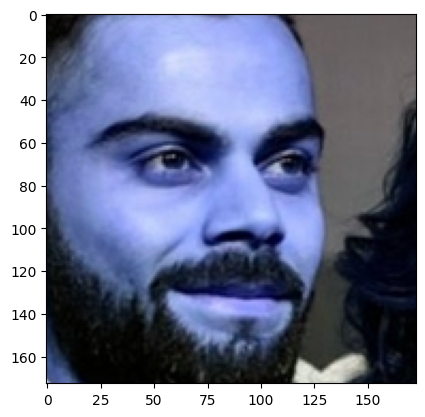

In [130]:
plt.imshow(croppred_image_with_two_face)

In [131]:
path_to_dataset='./dataset/'
path_to_cr_data='./dataset/cropped/'

In [132]:
import os 
img_dirs=[]
for entry in os.scandir(path_to_dataset):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [133]:
img_dirs

['./dataset/Virat_kohli', './dataset/messi', './dataset/jennifer']

In [134]:
os.mkdir(path_to_cr_data)
#create the cropped folder inside dataset

In [135]:
#it checks if there is already the folder with the same path 
#and if there is then it deletes the folder and  then create the new one
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)#Recursively deletes a directory and all its contents.
os.mkdir(path_to_cr_data)

#### the os.rmdir() remove only the empty directory 
#### and os.removedirs() remove directories recurssively. once deleting the leaf directory it removes every directories mentioned in the path
#### to remove directories with the content shutil can be used

In [136]:
cropped_img_dir=[]
cropped_file_names_dict={}
for  img_dir in img_dirs :
    count=1
    celebrity_name=img_dir.split('/')[-1]
    cropped_file_names_dict[celebrity_name]=[]
    for entry in os.scandir(img_dir):
        roi_color=crop_image(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data+celebrity_name
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_img_dir.append(cropped_folder)
                print('geneating image in folder',cropped_folder)
            cropped_file_name=celebrity_name+str(count)+'.png'
            cropped_file_path=cropped_folder+'/'+cropped_file_name
            cv2.imwrite(cropped_file_path,roi_color)
            cropped_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1
            
    
   
    

geneating image in folder ./dataset/cropped/Virat_kohli


libpng warning: iCCP: known incorrect sRGB profile


geneating image in folder ./dataset/cropped/messi
geneating image in folder ./dataset/cropped/jennifer


In [134]:
import os
import cv2

img_dir = "./dataset/messi"

# Iterate over the images in the directory
for entry in os.scandir(img_dir):
    img_path = entry.path

    
        # Read the image
    img = cv2.imread(img_path)

        # Check if the image was successfully read
    if img is not None:
        pass
            # Process the image
            # ...
    else:
         print(f"Failed to read image: {img_path}")



Failed to read image: ./dataset/messi/.DS_Store


In [138]:

cropped_img_dir=[ './dataset/cropped/Virat_kohli','./dataset/cropped/messi', './dataset/cropped/jennifer']

In [139]:
cropped_img_dir


['./dataset/cropped/Virat_kohli',
 './dataset/cropped/messi',
 './dataset/cropped/jennifer']

In [140]:
cropped_file_names_dir={}
for img_dir in cropped_img_dir:
    celebrity_name=img_dir.split('/')[-1]
    cropped_file_names_dir[celebrity_name]=[]
    for entry in os.scandir(img_dir):
        cropped_file_names_dir[celebrity_name].append(entry.path)
cropped_file_names_dir

{'Virat_kohli': ['./dataset/cropped/Virat_kohli/Virat_kohli47.png',
  './dataset/cropped/Virat_kohli/Virat_kohli46.png',
  './dataset/cropped/Virat_kohli/Virat_kohli2.png',
  './dataset/cropped/Virat_kohli/Virat_kohli50.png',
  './dataset/cropped/Virat_kohli/Virat_kohli44.png',
  './dataset/cropped/Virat_kohli/Virat_kohli45.png',
  './dataset/cropped/Virat_kohli/Virat_kohli51.png',
  './dataset/cropped/Virat_kohli/Virat_kohli3.png',
  './dataset/cropped/Virat_kohli/Virat_kohli7.png',
  './dataset/cropped/Virat_kohli/Virat_kohli41.png',
  './dataset/cropped/Virat_kohli/Virat_kohli40.png',
  './dataset/cropped/Virat_kohli/Virat_kohli6.png',
  './dataset/cropped/Virat_kohli/Virat_kohli4.png',
  './dataset/cropped/Virat_kohli/Virat_kohli42.png',
  './dataset/cropped/Virat_kohli/Virat_kohli43.png',
  './dataset/cropped/Virat_kohli/Virat_kohli5.png',
  './dataset/cropped/Virat_kohli/Virat_kohli18.png',
  './dataset/cropped/Virat_kohli/Virat_kohli24.png',
  './dataset/cropped/Virat_kohli/Vira

In [141]:
cropped_file_names_dir


{'Virat_kohli': ['./dataset/cropped/Virat_kohli/Virat_kohli47.png',
  './dataset/cropped/Virat_kohli/Virat_kohli46.png',
  './dataset/cropped/Virat_kohli/Virat_kohli2.png',
  './dataset/cropped/Virat_kohli/Virat_kohli50.png',
  './dataset/cropped/Virat_kohli/Virat_kohli44.png',
  './dataset/cropped/Virat_kohli/Virat_kohli45.png',
  './dataset/cropped/Virat_kohli/Virat_kohli51.png',
  './dataset/cropped/Virat_kohli/Virat_kohli3.png',
  './dataset/cropped/Virat_kohli/Virat_kohli7.png',
  './dataset/cropped/Virat_kohli/Virat_kohli41.png',
  './dataset/cropped/Virat_kohli/Virat_kohli40.png',
  './dataset/cropped/Virat_kohli/Virat_kohli6.png',
  './dataset/cropped/Virat_kohli/Virat_kohli4.png',
  './dataset/cropped/Virat_kohli/Virat_kohli42.png',
  './dataset/cropped/Virat_kohli/Virat_kohli43.png',
  './dataset/cropped/Virat_kohli/Virat_kohli5.png',
  './dataset/cropped/Virat_kohli/Virat_kohli18.png',
  './dataset/cropped/Virat_kohli/Virat_kohli24.png',
  './dataset/cropped/Virat_kohli/Vira

In [142]:
class_dict={}
count=0
for celebrity_name in cropped_file_names_dir.keys():
    class_dict[celebrity_name]=count
    count+=1

In [143]:
class_dict

{'Virat_kohli': 0, 'messi': 1, 'jennifer': 2}

### Wavelet transform


#### In wavelet transformed iamge, we can see edges clearly and that can give us clues on various facial features such as eyes ,nose, lips etc

In [144]:
import numpy as np
import pywt
def w2d(img,mode='haar',level=1):
    imArray=img
    #the image is converted into the gray image
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #the image values are converted into the data type float
    imArray=np.float32(imArray)
    #It is then normalized(scaled) by dividing by 255 so the pixel values ranges from 0 to 1
    imArray/=255
    #tuple containing wavelet coffeicients for different frequency band in the image is returned
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0
    imArray_H=pywt.waverec2(coeffs_H,mode)
    imArray_H*=255
    imArray_H=np.uint8(imArray_H)
    return imArray_H
    
    
    




In [145]:
img=cv2.imread('./dataset/cropped/jennifer/jennifer88.png')

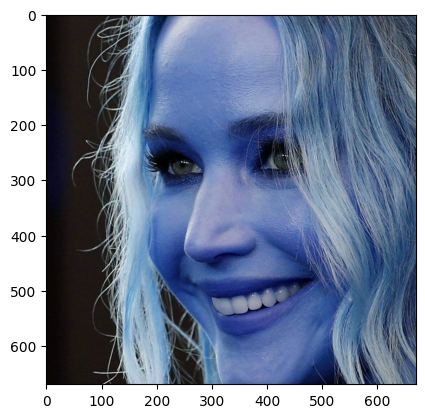

In [146]:
plt.imshow(img)

In [147]:
img_grayj=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

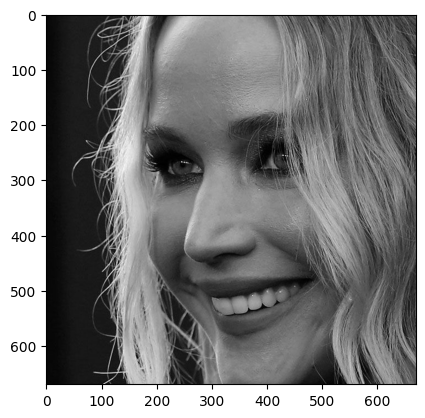

In [148]:
plt.imshow(img_grayj)

img=cv2.imread('./dataset/cropped/jennifer/jennifer10.png')
img_gray=cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)
img_gray = np.float32(img_gray)
img_gray /= 255
coeff1 = pywt.wavedec2(img_gray, 'db1', level= 5)
coeffsl = list(coeff1)
coeffsl[0] *=0 
imArrayl = pywt.waverec2(coeffsl, 'db1')
imArrayl *=255
imArrayl = np.uint8(imArrayl)

In [149]:
plt.imshow(imArrayl)


NameError: name 'imArrayl' is not defined

In [150]:
im_har=w2d(cv2.imread('./dataset/cropped/jennifer/jennifer88.png'),'db1',5)

/var/folders/lb/j81n4r5516l0zy01s9b7gllh0000gn/T/ipykernel_46762/3964238810.py:17: RuntimeWarning: invalid value encountered in cast
  imArray_H=np.uint8(imArray_H)


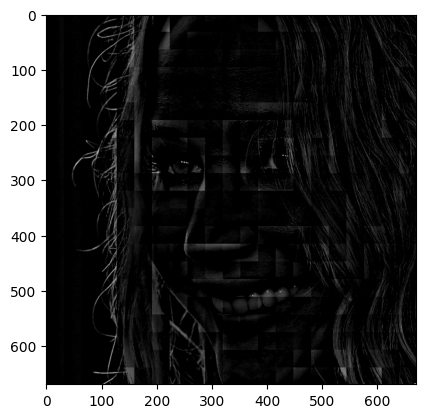

In [151]:
plt.imshow(im_har,cmap='gray')


### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [162]:
X,y=[],[]
for celebrity_name,training_file in cropped_file_names_dir.items():
    for training_image in training_file:
        img=cv2.imread(training_image)
        scaled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scaled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

/var/folders/lb/j81n4r5516l0zy01s9b7gllh0000gn/T/ipykernel_46762/3964238810.py:17: RuntimeWarning: invalid value encountered in cast
  imArray_H=np.uint8(imArray_H)


In [161]:
import cv2

for training_image in training_file:
    try:
        img = cv2.imread(training_image)
        if img is None:
            raise ValueError(f"Unable to read image: {training_image}")
        
        scaled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32, 32))
        
        # Rest of your code for image processing
        
    except Exception as e:
        print(f"Error processing image: {training_image}")
        print(f"Error message: {str(e)}")

/var/folders/lb/j81n4r5516l0zy01s9b7gllh0000gn/T/ipykernel_46762/3964238810.py:17: RuntimeWarning: invalid value encountered in cast
  imArray_H=np.uint8(imArray_H)


In [163]:
len(X[0])


4096

In [164]:
type(X)

list

In [165]:
X=np.array(X).reshape(len(X),4096).astype(float)

In [166]:
X.shape

(171, 4096)

In [168]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [170]:
X_train ,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.2)


In [172]:
pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])

In [174]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=10))])

In [175]:
pipe.score(X_test,y_test)

0.8857142857142857

In [179]:

print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.83      0.71      0.77         7
           2       0.95      0.95      0.95        21

    accuracy                           0.89        35
   macro avg       0.85      0.84      0.84        35
weighted avg       0.89      0.89      0.89        35



In [180]:
from sklearn.linear_model import LogisticRegression

In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [196]:
model_params={
    'svc':{
        'model':svm.SVC(gamma='auto',probability=True),
        'params':{
            'svc__kernel':['rbf','linear','poly'],
            'svc__C':[1,10,100,1000]
        }
    },
    'LogisticRegression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C': [1,5,10]
        }
    },
    'RandomForest':{
        'model':RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators': [1,5,10]}
    }
}

In [209]:
best_estimator={}
scores=[]
for model, mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':model,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
        
    })
    best_estimator[model]=clf.best_estimator_
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [210]:
df

,model,best_score,best_params
0,svc,0.933333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,LogisticRegression,0.948413,{'logisticregression__C': 1}
2,RandomForest,0.845767,{'randomforestclassifier__n_estimators': 5}


In [211]:
best_estimator


{'svc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'LogisticRegression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))]),
 'RandomForest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))])}

In [212]:
best_estimator['svc'].score(X_test,y_test)

0.9714285714285714

In [213]:
best_estimator['RandomForest'].score(X_test,y_test)

0.8571428571428571

In [214]:
best_estimator['LogisticRegression'].score(X_test,y_test)

0.9714285714285714

In [215]:
best_clf=best_estimator['svc']

In [216]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(X_test))

In [217]:
cm

array([[ 6,  1,  0],
       [ 0,  7,  0],
       [ 0,  0, 21]])

Text(95.72222222222221, 0.5, 'Truth')

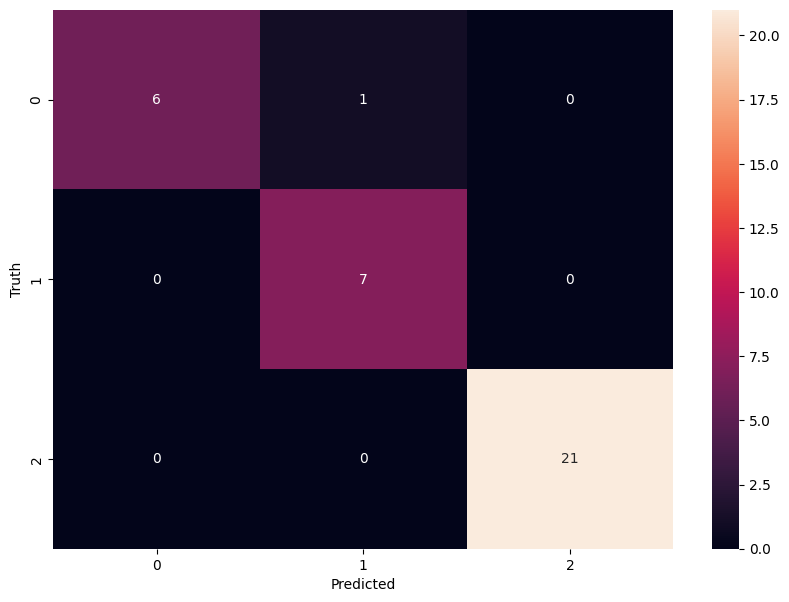

In [218]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [219]:

import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model_image_classification.pkl') 

['saved_model_image_classification.pkl']

In [220]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))